Step 1: Generating and visualizing the data...


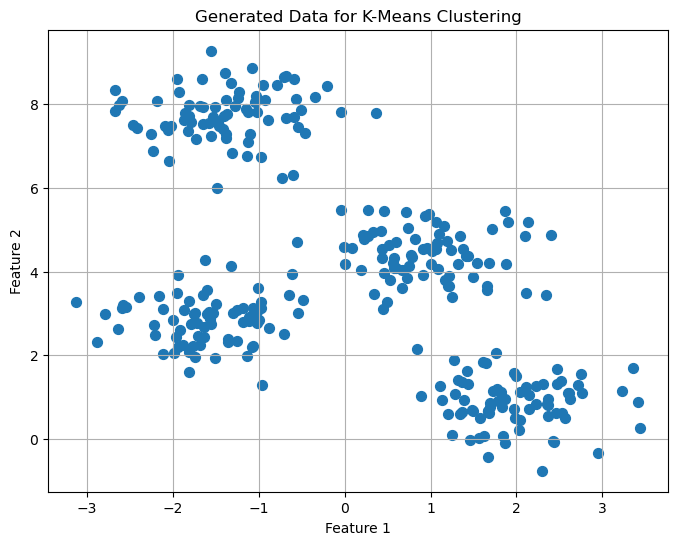


Step 2: Implementing K-Means from scratch and visualizing iterations...
Running iteration 1...


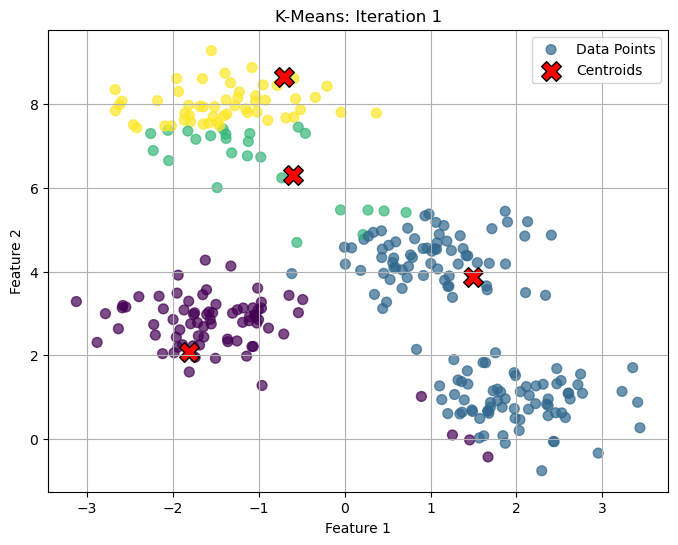

Running iteration 2...


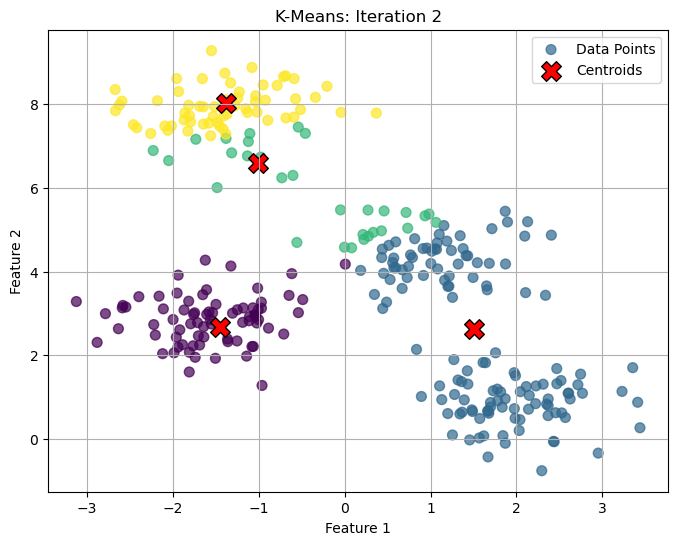

Running iteration 3...


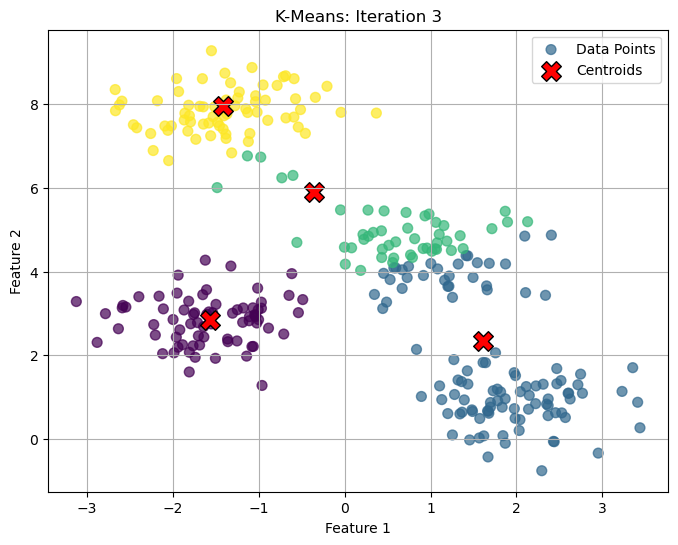

Running iteration 4...


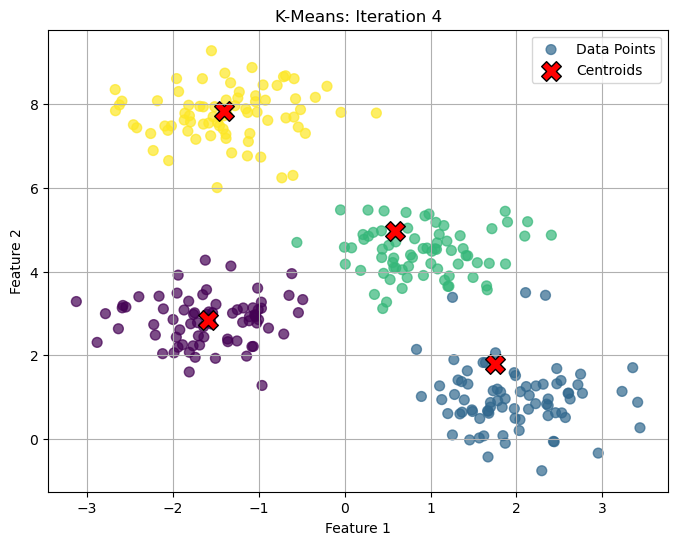

Running iteration 5...


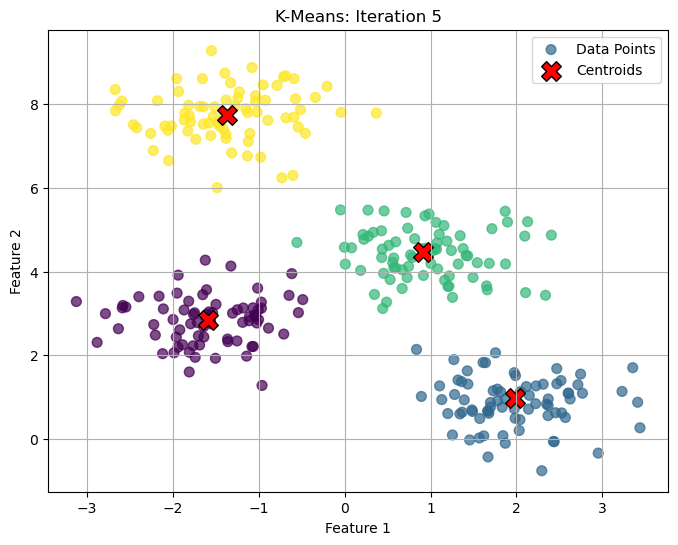

Running iteration 6...


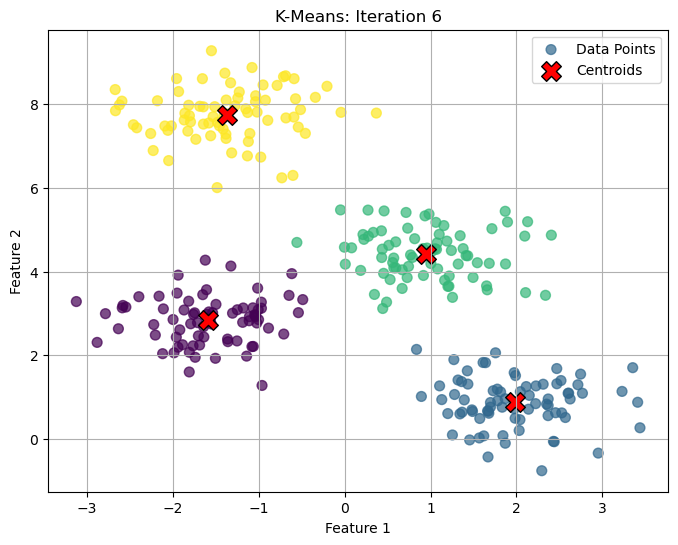


K-Means has converged after 6 iterations.

Step 3: Using the optimized scikit-learn KMeans implementation...


C:\Users\Dody\anaconda3\envs\cuda126\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


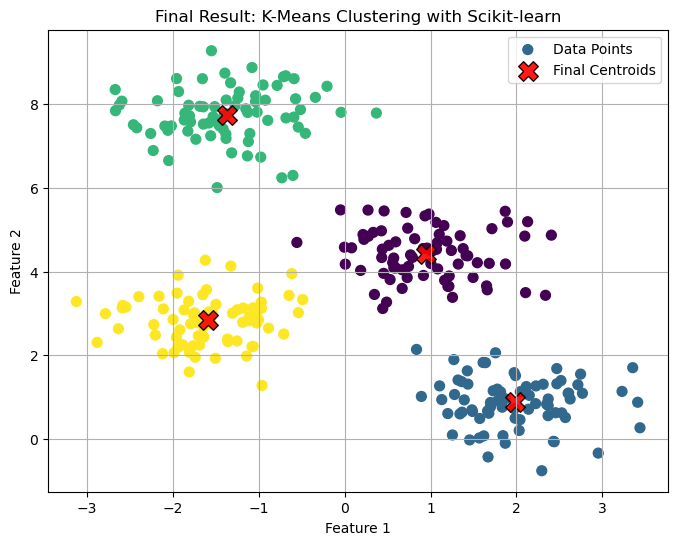


Clustering complete.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import copy

# --- 1. Setup and Data Generation ---
print("Step 1: Generating and visualizing the data...")

# Generate synthetic data with 4 distinct clusters
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Generated Data for K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# --- 2. K-Means Algorithm from Scratch with Iteration Visualization ---
print("\nStep 2: Implementing K-Means from scratch and visualizing iterations...")

def assign_to_clusters(X, centroids):
    """Assigns each data point to the closest centroid."""
    clusters = []
    for point in X:
        # Calculate Euclidean distance from the point to each centroid
        distances = [np.linalg.norm(point - centroid) for centroid in centroids]
        # Assign the point to the cluster with the minimum distance
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    """Updates the centroids by taking the mean of all points in a cluster."""
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Get all points assigned to the current cluster
        points_in_cluster = X[clusters == i]
        # If the cluster is not empty, calculate its mean
        if len(points_in_cluster) > 0:
            new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids

def plot_kmeans_iteration(X, clusters, centroids, iteration):
    """Plots the state of the clusters at a given iteration."""
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis', alpha=0.7, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids', edgecolor='black')
    plt.title(f'K-Means: Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Main loop for the "from scratch" implementation ---

# Set the number of clusters
k = 4

# Randomly initialize centroids from the data points
np.random.seed(42) # for reproducibility
random_indices = np.random.choice(X.shape[0], size=k, replace=False)
centroids = X[random_indices, :]

old_centroids = np.zeros(centroids.shape)
iteration = 0

# Loop until the centroids no longer change (convergence)
while not np.all(centroids == old_centroids):
    iteration += 1
    print(f"Running iteration {iteration}...")

    # Assign points to the current centroids
    clusters = assign_to_clusters(X, centroids)

    # Visualize the current state
    plot_kmeans_iteration(X, clusters, centroids, iteration)

    # Store old centroids to check for convergence
    old_centroids = copy.deepcopy(centroids)

    # Update centroids based on the new cluster assignments
    centroids = update_centroids(X, clusters, k)

print(f"\nK-Means has converged after {iteration} iterations.")

# --- 3. K-Means Clustering using scikit-learn ---
print("\nStep 3: Using the optimized scikit-learn KMeans implementation...")

# Create a KMeans instance with 4 clusters
# n_init=10 runs the algorithm 10 times with different centroid seeds.
# The final results will be the best output of these 10 consecutive runs.
kmeans_sklearn = KMeans(n_clusters=4, random_state=0, n_init=10)

# Fit the model to the data (this runs the entire algorithm)
kmeans_sklearn.fit(X)

# Get the cluster assignments and the final centroids
y_kmeans = kmeans_sklearn.labels_
centers = kmeans_sklearn.cluster_centers_

# Visualize the final results from scikit-learn
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.9, marker='X', label='Final Centroids', edgecolor='black')
plt.title('Final Result: K-Means Clustering with Scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

print("\nClustering complete.")